In [1]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report



In [2]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('Project.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
156037,0,1956013518,Thu May 28 21:01:34 PDT 2009,NO_QUERY,mellieandsammy,Just watched UK apprentice from last night - t...
1561096,4,2186503642,Mon Jun 15 18:56:05 PDT 2009,NO_QUERY,KATHRYNNhxc,i think i just may slice my leg off.
666438,0,2245278272,Fri Jun 19 15:54:31 PDT 2009,NO_QUERY,DMD80,@yelyahwilliams oh my god ive just been in hos...
1536288,4,2179222866,Mon Jun 15 08:48:46 PDT 2009,NO_QUERY,DonnaSpeaks,@ninasplayground Your fav food list resembles ...
1102187,4,1970903547,Sat May 30 05:36:24 PDT 2009,NO_QUERY,michelleorpe,@jensen_ackles I gave you a shout out on my sh...


In [3]:
df.head()


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.columns


Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [5]:
print('length of data is', len(df))


length of data is 1600000


In [6]:
df. shape


(1600000, 6)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [8]:
df.dtypes


target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

In [9]:
np.sum(df.isnull().any(axis=1))


0

In [10]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))


Count of columns in the data is:   6
Count of rows in the data is:   1600000


In [11]:
df['target'].unique()


array([0, 4], dtype=int64)

In [12]:
df['target'].nunique()


2

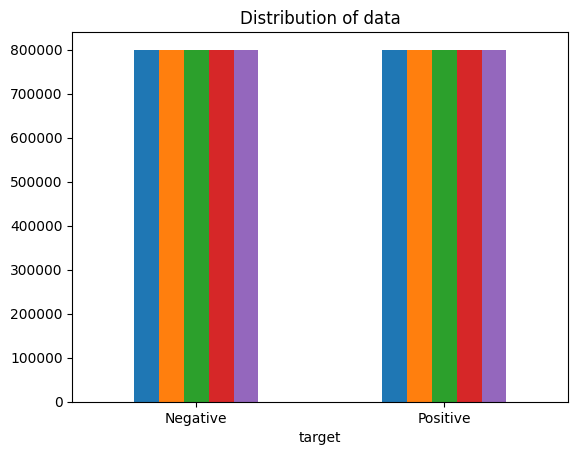

In [13]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

In [14]:
data=df[['text','target']]

In [15]:
data['target'] = data['target'].replace(4,1)


C:\Users\KRISHNA SAI\AppData\Local\Temp\ipykernel_24312\64576989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [16]:
data['target'].unique()


array([0, 1], dtype=int64)

In [17]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [18]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [19]:
datasets = pd.concat([data_pos, data_neg])


In [20]:
datasets['text']=datasets['text'].str.lower()
datasets['text'].tail()

19995    not much time off this weekend, work trip to m...
19996                            one more day of holidays 
19997    feeling so down right now .. i hate you damn h...
19998    geez,i hv to read the whole book of personalit...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

In [21]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [22]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
datasets['text'] = datasets['text'].apply(lambda text: cleaning_stopwords(text))
datasets['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [23]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
datasets['text']= datasets['text'].apply(lambda x: cleaning_punctuations(x))
datasets['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [24]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
datasets['text'] = datasets['text'].apply(lambda x: cleaning_repeating_char(x))
datasets['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [25]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
datasets['text'] = datasets['text'].apply(lambda x: cleaning_URLs(x))
datasets['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [26]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
datasets['text'] = datasets['text'].apply(lambda x: cleaning_numbers(x))
datasets['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

In [27]:
from nltk.tokenize import RegexpTokenizer

# Assuming you already have 'dataset' defined

tokenizer = RegexpTokenizer(r'\w+')
datasets['text'] = datasets['text'].apply(tokenizer.tokenize)
print(datasets['text'].head())


800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object


In [28]:
datasets['text']

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
                                ...                        
19995     [not, much, time, off, weekend, work, trip, ma...
19996                                  [one, day, holidays]
19997                 [feeling, right, hate, damn, humprey]
19998     [geezi, hv, read, whole, book, personality, ty...
19999     [threw, sign, donnie, bent, over, get, but, th...
Name: text, Length: 40000, dtype: object

In [29]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
datasets['text']= datasets['text'].apply(lambda x: stemming_on_text(x))
datasets['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [30]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
datasets['text'] = datasets['text'].apply(lambda x: lemmatizer_on_text(x))
datasets['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [31]:
X=data.text
y=data.target

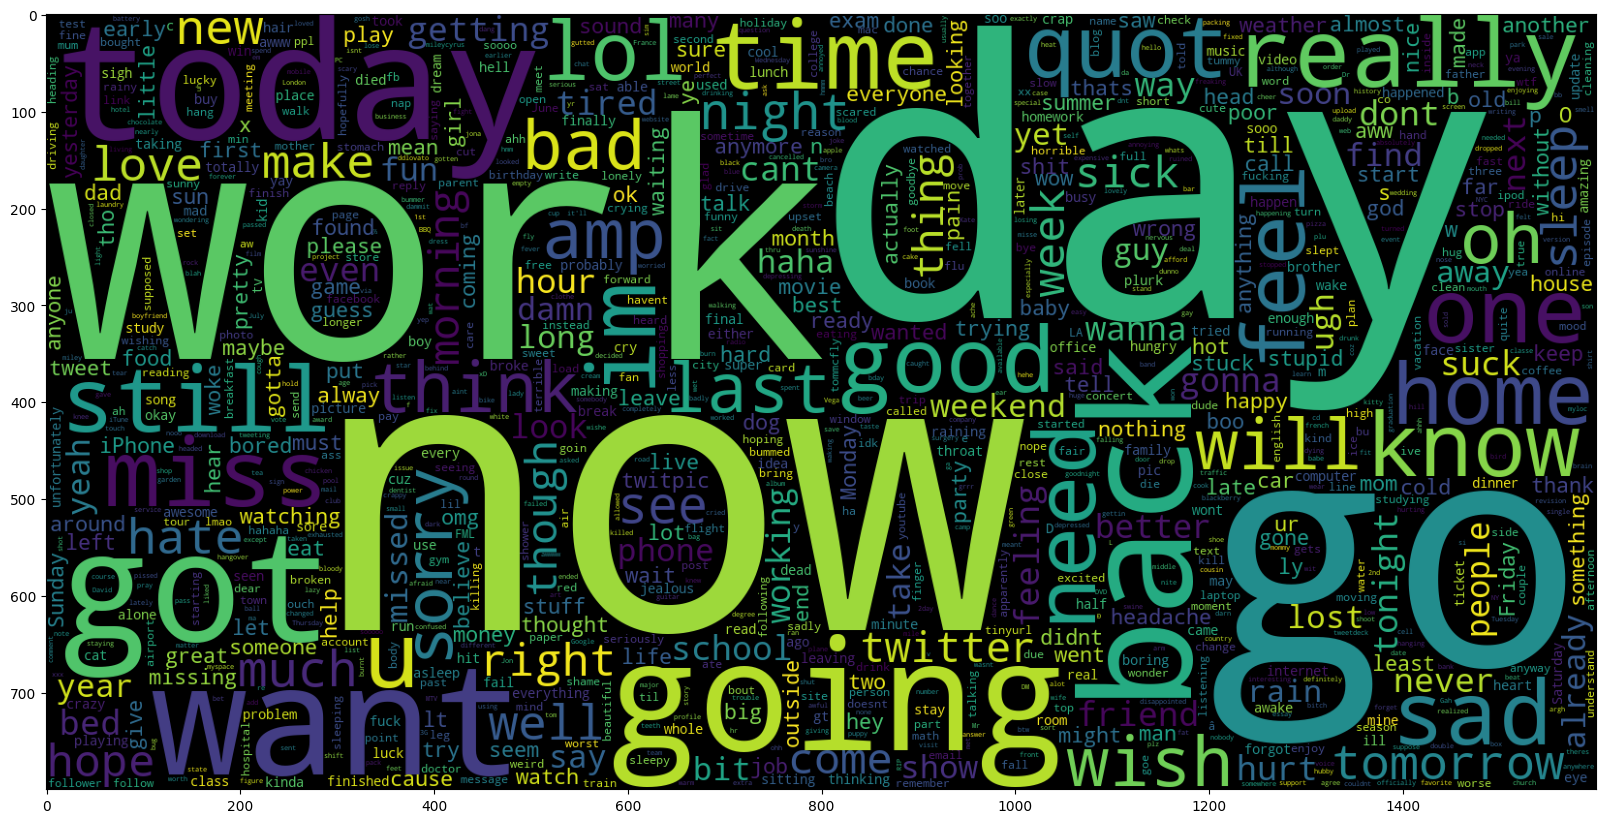

In [32]:
data_neg = data['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

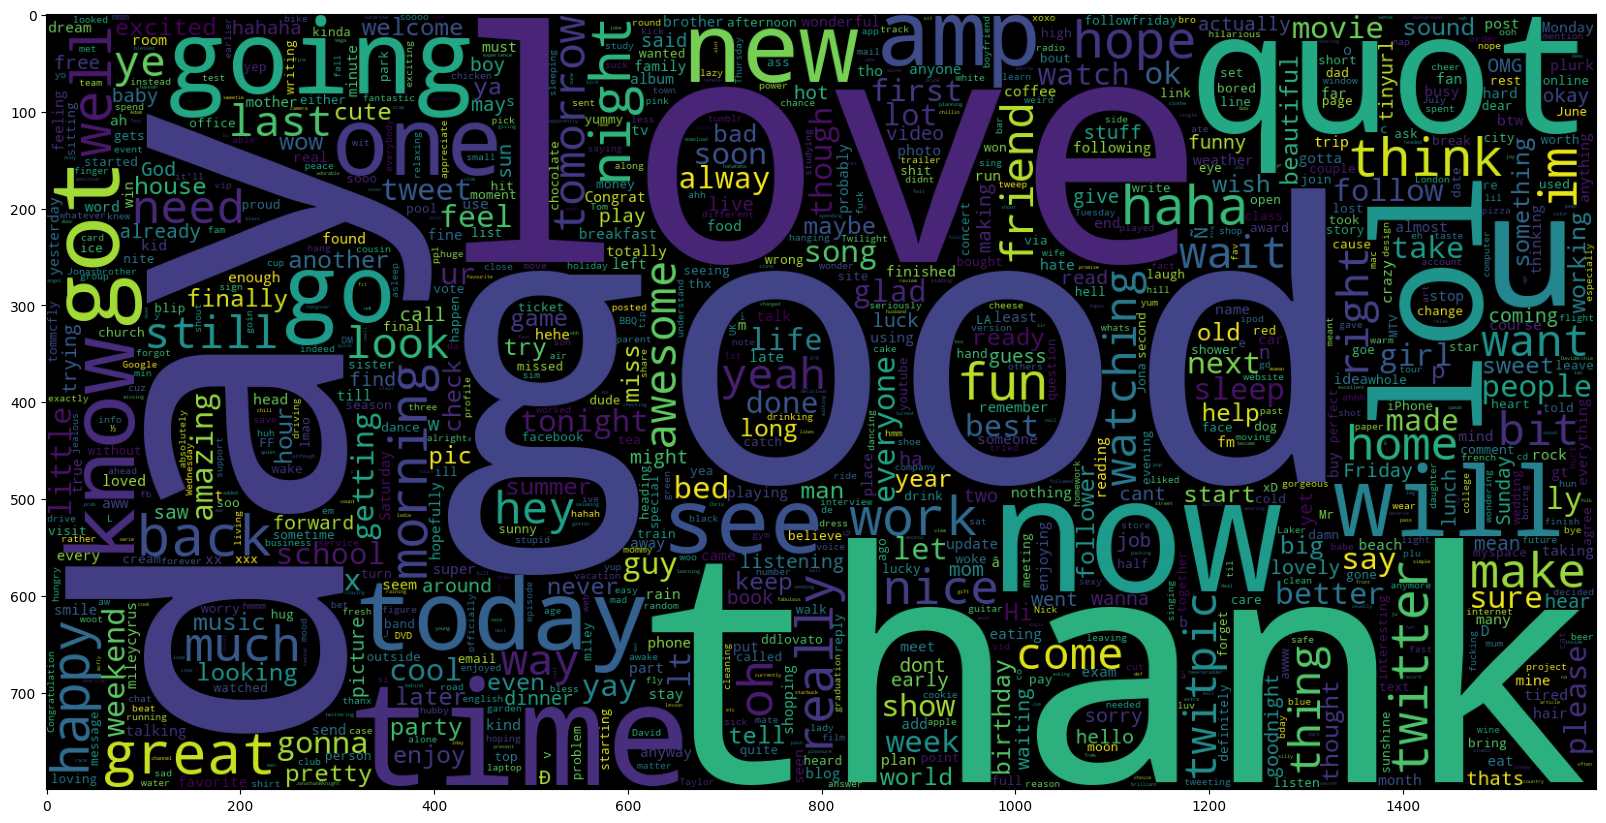

In [33]:
data_pos = data['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have already defined X_train

vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectorizer.fit(X_train)
print('No. of feature_words: ', len(vectorizer.get_feature_names_out()))


No. of feature_words:  500000


In [37]:
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

def model_Evaluate(model, X_test, y_test):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    plt.show()


              precision    recall  f1-score   support

           0       0.81      0.79      0.80     40100
           1       0.80      0.81      0.80     39900

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



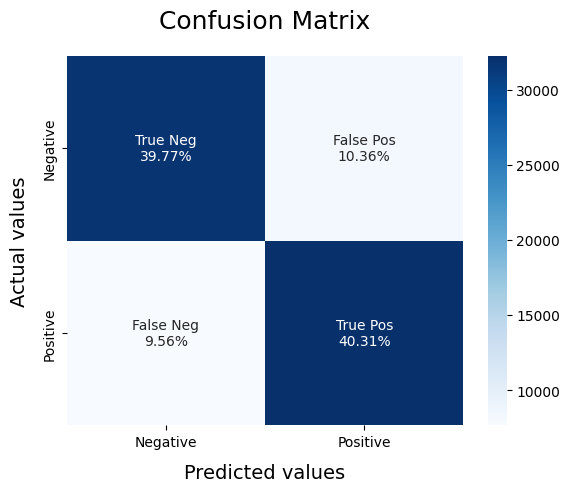

In [41]:
from sklearn.naive_bayes import BernoulliNB

# Assuming BNBmodel, X_train, y_train, X_test, and y_test are defined

# Train the Bernoulli Naive Bayes model
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)

# Evaluate the model
model_Evaluate(BNBmodel, X_test, y_test)

# Make predictions on the test data
y_pred1 = BNBmodel.predict(X_test)


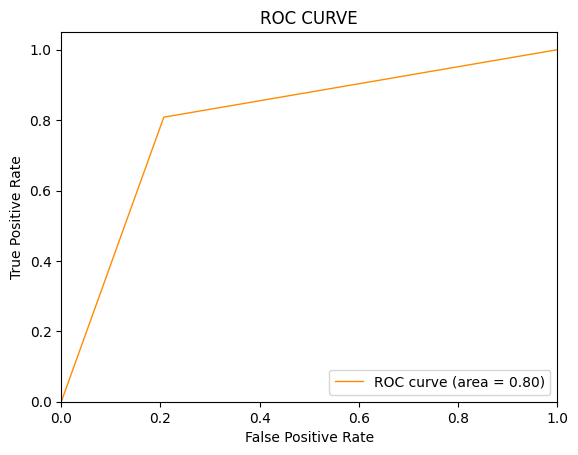

In [42]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [43]:
print(X_train)

  (0, 474323)	0.38979332230385944
  (0, 474176)	0.2665205433658159
  (0, 413712)	0.40611073264143915
  (0, 408905)	0.10875635139819881
  (0, 390375)	0.39091653941347654
  (0, 389843)	0.2167090315423518
  (0, 369899)	0.34988373596842476
  (0, 291302)	0.19203807281735005
  (0, 263670)	0.4486537283573417
  (0, 248433)	0.19977019672787782
  (1, 496848)	0.2825748963971193
  (1, 495639)	0.1301577597238682
  (1, 462212)	0.16133011472767458
  (1, 461770)	0.1424047808958501
  (1, 434779)	0.16596615013584382
  (1, 430780)	0.06868727803033145
  (1, 424179)	0.26563313631394353
  (1, 423805)	0.11790788747895042
  (1, 379045)	0.32673149998853657
  (1, 379026)	0.23471566593441628
  (1, 362227)	0.264202748611993
  (1, 361630)	0.1394384026295968
  (1, 345548)	0.4104121576896521
  (1, 324287)	0.17757754676008927
  (1, 279558)	0.2417549838087402
  :	:
  (1519999, 359341)	0.1853939385853274
  (1519999, 356419)	0.19337651407024822
  (1519999, 356369)	0.11560319572189622
  (1519999, 325504)	0.25092965513469

In [50]:
print(y_pred1)
print(y_test)

[1 1 1 ... 1 0 0]
1562805    1
1463536    1
1253186    1
723307     0
1076693    1
          ..
97603      0
635111     0
1063228    1
314151     0
279086     0
Name: target, Length: 80000, dtype: int64
